In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [50]:
# since output variable/target value has only 2 values either rock or mine hence I am using Logistic regression.
#since Logistic regression algo is used over here, I am using GaussianNB.

In [51]:
raw_data=pd.read_csv("sonar_data.csv", names=range(0,61),header=0)

In [52]:
data = pd.DataFrame(data=raw_data)

In [53]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [54]:
# Now we will start with EDA process from here.

In [55]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [56]:
#since standard deviation is very low, it indicates that data is very less dispersed.
# also we can see that no value in IQR1 is less than min value and no value in IQR 3 is greater than max value which indicates 
#that there are no outliers in data

In [57]:
data.isnull()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [59]:
# here we can see that there are no null values in data set.

<AxesSubplot:>

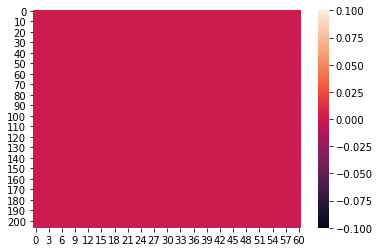

In [60]:
sns.heatmap(data.isnull()) # heatmap also indicates that there are  no null values in data

In [61]:
#checking for outliers using Inter quartile range functionality
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

0     0.02250
1     0.03170
2     0.03930
3     0.04125
4     0.06335
5     0.06720
6     0.07245
7     0.08945
8     0.13475
9     0.15785
10    0.17360
11    0.19815
12    0.18575
13    0.21085
14    0.28655
15    0.34015
16    0.45455
17    0.43715
18    0.43285
19    0.45900
20    0.42050
21    0.42580
22    0.39700
23    0.33290
24    0.34975
25    0.35025
26    0.38760
27    0.36790
28    0.39105
29    0.32270
30    0.29390
31    0.30160
32    0.29940
33    0.36685
34    0.41285
35    0.39995
36    0.35020
37    0.26450
38    0.25810
39    0.23880
40    0.22505
41    0.22640
42    0.16985
43    0.14080
44    0.13530
45    0.13225
46    0.09055
47    0.07475
48    0.04265
49    0.01360
50    0.01235
51    0.00940
52    0.00985
53    0.00910
54    0.00800
55    0.00595
56    0.00665
57    0.00680
58    0.00670
59    0.00545
dtype: float64


In [62]:
print(data < (Q1 - 1.5 * IQR)) or (data > (Q3 + 1.5 * IQR))

        0      1      2      3      4      5      6      7      8      9   \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
202  False  False  False  False  False  False  False  False  False  False   
203  False  False  False  False  False  False  False  False  False  False   
204  False  False  False  False  False  False  False  False  False  False   
205  False  False  False  False  False  False  False  False  False  False   
206  False  False  False  False  False  False  False  False  False  False   

     ...     51     52     53     54     55     56     57     58     59    

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
#corr= data.corr()
#sns.heatmap(corr,annot=True,linewidths=.5)
#plt.show()
#Here I was tryinig to plot a heatmap for entire dataset but heatmap size is very small and is of no use. 

In [64]:
x= data.iloc[:,0:-1]

In [65]:
x.shape

(207, 60)

In [66]:
pca=PCA(n_components=10)

In [67]:
x=pca.fit_transform(x)

In [68]:
x.shape

(207, 10)

In [69]:
scale = StandardScaler()

In [70]:
x=scale.fit_transform(x)

In [71]:
x.shape

(207, 10)

In [72]:
y=data.iloc[:,-1]

In [73]:
y.shape

(207,)

In [74]:
#since predicted value/ output variable is string 'R' or 'M' and machine requires numerical data for model building, 
#I am using Encoding techniqueue to convert string to numerical values.
 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [75]:
# here we try to find which is the best random state value for a given range and then use the best random state to find 
#accuracy score, confusion matrix and classification report using Linear Regression method

In [87]:
best_rstate=0
best_acc_score=0
for i in range(1,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    temp_acc_score=accuracy_score(pred,test_y)
    if temp_acc_score > best_acc_score:
        best_acc_score = temp_acc_score
        best_rstate=i
        
print("Best_Accuracy score is:",best_acc_score, "\nBest random state value is:",best_rstate)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=best_rstate)
#train_x.shape,test_x.shape,train_y.shape,test_y.shape
lg=LogisticRegression()
lg.fit(train_x,train_y)
predlg=lg.predict(test_x)
print("Predicted values using Linear Regeression model:\n",predlg)

print("Random state used is:",best_rstate)
print("Accuracy score:",accuracy_score(predlg,test_y))
print("Confusion matrix:\n",confusion_matrix(test_y, predlg))
print("Classification report:\n",classification_report(test_y,predlg))

Best_Accuracy score is: 0.9047619047619048 
Best random state value is: 329
Predicted values using Linear Regeression model:
 [0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1
 1 0 0 1 1]
Random state used is: 329
Accuracy score: 0.9047619047619048
Confusion matrix:
 [[19  1]
 [ 3 19]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.95      0.86      0.90        22

    accuracy                           0.90        42
   macro avg       0.91      0.91      0.90        42
weighted avg       0.91      0.90      0.90        42



In [77]:
#Here we use cross validation technique wuth Linear regression to rotate entire dataset in train and test mode with 5 rounds 
cross_score=cross_val_score(lg,x,y,cv=5)
print("Cross validation score=", cross_score)
print("Cross validation mean score=", cross_score.mean())
print("Cross validation standard deviation score=", cross_score.std())

Cross validation score= [0.42857143 0.92857143 0.6097561  0.90243902 0.46341463]
Cross validation mean score= 0.6665505226480837
Cross validation standard deviation score= 0.21233096125198714


In [78]:
# here we try to find which is the best random state value for a given range and then use the best random state to find 
#accuracy score, confusion matrix and classification report using GaussianNB Regression method

In [79]:
best_rstate_gnb=0
best_acc_score_gnb=0
for j in range(1,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=j)
    gnb=GaussianNB()
    gnb.fit(train_x,train_y)
    pred=gnb.predict(test_x)
    temp_acc_score_gnb=accuracy_score(pred,test_y)
    if temp_acc_score_gnb > best_acc_score_gnb:
        best_acc_score_gnb = temp_acc_score_gnb
        best_rstate_gnb=j
        
print("Best_Accuracy score is:",best_acc_score_gnb, "\nBest random state value is:",best_rstate_gnb)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=best_rstate_gnb)
#train_x.shape,test_x.shape,train_y.shape,test_y.shape
gnb=GaussianNB()
gnb.fit(train_x,train_y)
predgnb=gnb.predict(test_x)

print("Random state used is:",best_rstate_gnb)
print("Accuracy score:",accuracy_score(predgnb,test_y))
print("Confusion matrix:\n",confusion_matrix(test_y, predgnb))
print("Classification report:\n",classification_report(test_y,predgnb))

Best_Accuracy score is: 0.9285714285714286 
Best random state value is: 450
Random state used is: 450
Accuracy score: 0.9285714285714286
Confusion matrix:
 [[26  1]
 [ 2 13]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95        27
           1       0.93      0.87      0.90        15

    accuracy                           0.93        42
   macro avg       0.93      0.91      0.92        42
weighted avg       0.93      0.93      0.93        42



In [80]:
#Here we use cross validation technique to rotate entire dataset in train and test mode with 5 rounds 
cross_score_gnb=cross_val_score(gnb,x,y,cv=5)
print("Cross validation score=", cross_score_gnb)
print("Cross validation mean score=", cross_score_gnb.mean())
print("Cross validation standard deviation score=", cross_score_gnb.std())

Cross validation score= [0.42857143 0.73809524 0.43902439 0.73170732 0.3902439 ]
Cross validation mean score= 0.5455284552845528
Cross validation standard deviation score= 0.15548626224792733


In [86]:
# now we are storing output in file in local
output_data_lg=pd.DataFrame(predlg)
output_data_lg.to_csv("sonar_logistic_regression_prediction.csv",header=0)
###
output_data_gnb=pd.DataFrame(predgnb)
output_data_gnb.to_csv("sonar_GNB_prediction.csv",header=0)

In [85]:
# now we will save our model for production use
import joblib
joblib.dump(lg,'logistic_regression.obj')

#lg_from_joblib=joblib.load('logistic_regression.obj')
#lg_from_joblib.predict(test_x)

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1])